# Mathematical Underpinnings - Lab 10

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import scale

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lars
from sklearn.linear_model import LassoLars
from sklearn.linear_model import Lasso

## Task 1

In [4]:
df = pd.read_csv('prostate.data', sep="\t", index_col=0)

In [5]:
X = np.array(df.iloc[:, 0:8])
Y = np.array(df.iloc[:, 8])

In [6]:
X = scale(X)
Y = scale(Y)

### a)

In [7]:
mod_lars = Lars(fit_intercept=False)
# fit
mod_lars.fit(X,Y)

Lars(fit_intercept=False)

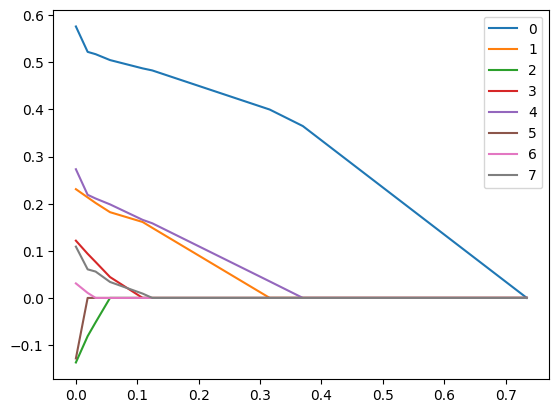

In [8]:
# plot
plt.plot(mod_lars.alphas_,mod_lars.coef_path_.T)
plt.legend(range(10))
plt.show()

Order in which the variables are included in the model:

In [9]:
np.argsort(np.argmax(mod_lars.coef_path_ != 0, 1))

array([0, 4, 1, 7, 3, 2, 6, 5], dtype=int64)

### b)

In [10]:
mod_lars.alphas_[0]

0.7344603262136732

In [11]:
alpha_1 = np.max(np.abs(np.corrcoef(X.T, Y)[:-1,-1]))
alpha_1

0.7344603262136737

### b1)

In [12]:
selected_variables = []

In [13]:
selected_variables.append(np.argmax(np.abs(np.corrcoef(X.T, Y)[:-1, -1])))
selected_variables

[0]

### b2)

In [14]:
mod1 = LinearRegression(fit_intercept=False)
# ...
mod1.fit(X[:, selected_variables], Y)
beta_1 = mod1.coef_[0]
beta_1

0.7344603262136729

### b3)

In [15]:
# code 
alpha_value = np.linspace(0, 1, 100)
Y_hat = mod1.predict(X[:,selected_variables])
correlation = []
for alpha in alpha_value:
    r = Y - alpha *  Y_hat
    correlation.append(np.corrcoef( X.T, r)[ : -1, -1])
correlation = np.vstack(correlation)

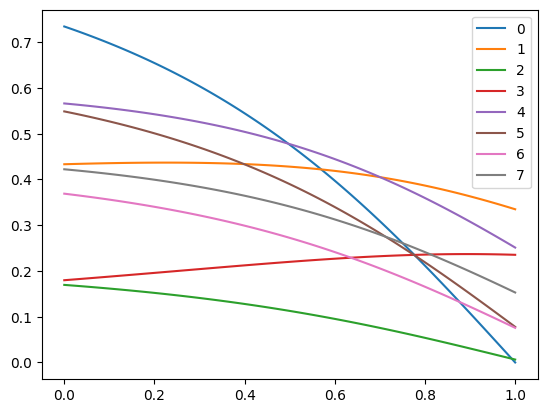

In [16]:
# plot
plt.plot(alpha_value,correlation)
plt.legend(range(10))
plt.show()

### b4)

Line 4

In [17]:
correlation[49, 0], correlation[49, 4]

(0.47961521036518956, 0.478835954257157)

### b5)

$$ \textrm{Cor}(Y - \tilde\alpha\hat Y, X_i) = ... \cdot\textrm{Cor}(Y, X_i) - ... \cdot \tilde\alpha \cdot \textrm{Cor}(\tilde\alpha\hat Y, X_i) $$

In our case, $i=0$, $j=4$:
$$ |\textrm{Cor}(Y - \tilde\alpha\hat Y, X_i)| = |\textrm{Cor}(Y - \tilde\alpha\hat Y, X_j)|$$

In [18]:
# code
val = []
for alpha in alpha_value:
    val.append(
        np.std(Y) * np.corrcoef(X.T, Y)[:-1, -1]
        - alpha * np.std(Y_hat) * np.corrcoef(X.T, Y_hat)[:-1, -1]
    )
val = np.vstack(val)

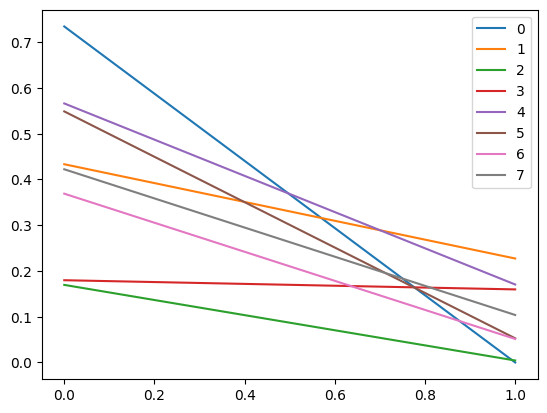

In [19]:
# plot
plt.plot(alpha_value,val)
plt.legend(range(10))
plt.show()

In [20]:
# Compute standard deviations
std_Y = np.std(Y)
std_Y_hat = np.std(Y_hat)

# Compute correlation coefficients
corr_X_Y = np.corrcoef(X.T, Y)[-1, :-1]
corr_X_Y_hat = np.corrcoef(X.T, Y_hat)[-1, :-1]

# Compute `a` and `b` arrays
a = std_Y * (np.corrcoef(X.T, Y)[selected_variables, -1] - corr_X_Y)
b = std_Y_hat * (np.corrcoef(X.T, Y_hat)[selected_variables, -1] - corr_X_Y_hat)

# Compute the ratio and find the minimum value
out = np.ones(X.shape[1])
np.divide(a, b, out=out, where=b != 0)
gamma_2 = np.min(out)

gamma_2


0.49672890138719566

In [21]:
selected_variables.append(np.argmin(out))
selected_variables

[0, 4]

### b6)

In [22]:
# Compute correlation coefficients
corr_X_Y_selected = np.corrcoef(X.T, Y)[selected_variables, -1]
corr_X_Y_hat_selected = np.corrcoef(X.T, Y_hat)[selected_variables, -1]
alpha_2 = std_Y * corr_X_Y_selected - gamma_2 * std_Y_hat * corr_X_Y_hat_selected
alpha_2

array([0.36963266, 0.36963266])

### b7)

In [23]:
Y = Y - gamma_2 * Y_hat

In [24]:
mod2 = LinearRegression(fit_intercept=False)
mod2.fit(X[:, selected_variables], Y)
beta_2 = mod2.coef_
beta_2

array([0.24020136, 0.24020136])

### b8)

In [27]:
alpha_values_2 = np.linspace(0, 1, 100)
Y_hat_2 = mod2.predict(X[:, selected_variables])

cor2 = []
for alpha in alpha_values_2:
    res = Y - alpha * Y_hat_2
    cor2.append(np.corrcoef(X.T, res)[:-1, -1])
cor2 = np.vstack(cor2)

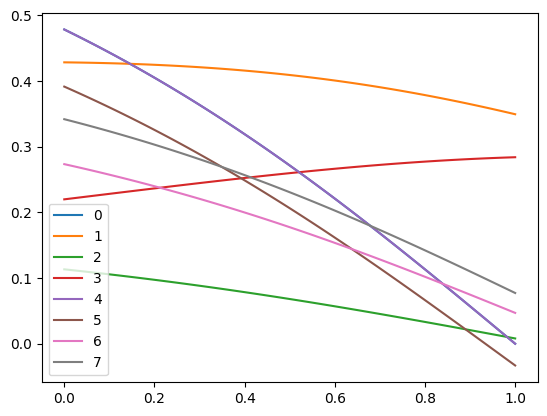

In [30]:
plt.plot(alpha_values_2,cor2)
plt.legend(range(10))
plt.show()

### b9)

In [32]:
for i in range(len(alpha_values_2)):
    if cor2[i][4] < cor2[i][1]:
        print(alpha_values_2[i])
        alpha_3 = alpha_values_2[i]
        break

0.15151515151515152


### b10)

In [39]:
val2 = []
for alpha in alpha_values_2:
    val2.append(
        np.std(Y) * np.corrcoef(X.T, Y)[:-1, -1]
        - alpha * np.std(Y_hat_2) * np.corrcoef(X.T, Y_hat_2)[:-1, -1]
    )
val = np.vstack(val)

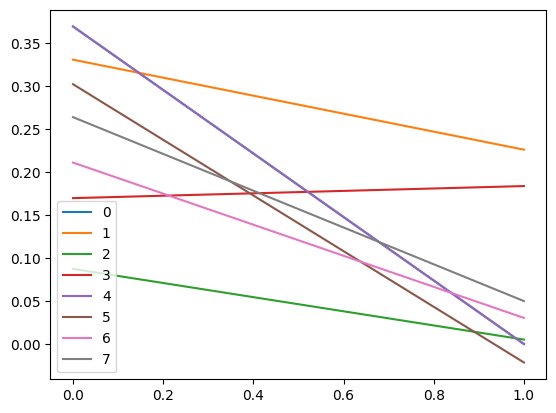

In [40]:
plt.plot(alpha_values_2,val2)
plt.legend(range(10))
plt.show()

In [44]:
# Compute standard deviations
std_Y = np.std(Y)
std_Y_hat = np.std(Y_hat_2)

# Compute correlation coefficients
corr_X_Y = np.corrcoef(X.T, Y)[-1, :-1]
corr_X_Y_hat = np.corrcoef(X.T, Y_hat_2)[-1, :-1]

# Compute `a` and `b` arrays
a = std_Y * (np.corrcoef(X.T, Y)[selected_variables[-1], -1] - corr_X_Y)
b = std_Y_hat * (np.corrcoef(X.T, Y_hat_2)[selected_variables[-1], -1] - corr_X_Y_hat)

# Compute the ratio and find the minimum value
out = np.ones(X.shape[1])
np.divide(a, b, out=out, where=b != 0)
gamma_3 = np.min(out)

gamma_3

0.1459087964935475

### b11)

In [47]:
corr_X_Y_selected = np.corrcoef(X.T, Y)[selected_variables, -1]
corr_X_Y_hat_selected = np.corrcoef(X.T, Y_hat_2)[selected_variables, -1]
alpha_3 = std_Y * corr_X_Y_selected - gamma_3 * std_Y_hat * corr_X_Y_hat_selected
alpha_3

array([0.3157, 0.3157])

In [ ]:
mod_lars = Lars(n_nonzero_coefs=80)
# fit

In [ ]:
# plot

In [ ]:
# the order

In [ ]:
mod_lassolars = LassoLars(alpha=0.15)
# fit

In [ ]:
# order

In [ ]:
# plot

In [ ]:
lasso_coef = np.zeros((X.shape[1], mod_lassolars.alphas_.shape[0]))

In [ ]:
for i in range(mod_lassolars.alphas_.shape[0]):
    mod_lasso = Lasso(alpha=mod_lassolars.alphas_[i])
    mod_lasso.fit(X, Y)

    lasso_coef[:,i] = mod_lasso.coef_

In [ ]:
# plot